In [175]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

In [176]:
# Paths to the diabetes datasets
DIABETES_FULL_PATH  = "tema2_Diabet/Diabet_full.csv"
DIABETES_TRAIN_PATH = "tema2_Diabet/Diabet_train.csv"
DIABETES_TEST_PATH = "tema2_Diabet/Diabet_test.csv"

# Columns of the diabetes dataset and their types
DIABETES_CATEGORICAL_COLUMNS = ["HealthcareInterest",
    "PreCVA",
    "RoutineChecks",
    "CompletedEduLvl",
    "alcoholAbuse",
    "cholesterol_ver",
    "vegetables",
    "HighBP",
    "Unprocessed_fructose",
    "Jogging",
    "IncreasedChol",
    "gender",
    "HealthScore",
    "myocardial_infarction",
    "SalaryBraket",
    "Cardio",
    "ImprovedAveragePulmonaryCapacity",
    "Smoker"]

DIABETES_NUMERIC_COLUMNS = [
    "psychological-rating",
    "BodyMassIndex",
    "Age",
    "CognitionScore",
    "Body_Stats",
    "Metabolical_Rate"
]

DIABETES_TARGET_ATTRIBUTE = "Diabetes"

# Paths to the credit risk datasets
CREDIT_RISK_FULL_PATH = "tema2_CreditRisk/credit_risk_full.csv"
CREDIT_RISK_TRAIN_PATH = "tema2_CreditRisk/credit_risk_train.csv"
CREDIT_RISK_TEST_PATH = "tema2_CreditRisk/credit_risk_test.csv"

# Diabetes Dataset

## Exploratory Data Analysis

### Numeric attribute analysis

In [188]:
diabetes_full : DataFrame = pandas.read_csv(DIABETES_FULL_PATH).rename(columns=lambda x: x.strip())

diabetes_full[DIABETES_CATEGORICAL_COLUMNS] = diabetes_full[DIABETES_CATEGORICAL_COLUMNS].astype('category')
diabetes_full[DIABETES_NUMERIC_COLUMNS] = diabetes_full[DIABETES_NUMERIC_COLUMNS].astype(np.float64)

diabetes_train : DataFrame = pandas.read_csv(DIABETES_TRAIN_PATH).rename(columns=lambda x: x.strip())
diabetes_train[DIABETES_CATEGORICAL_COLUMNS] = diabetes_train[DIABETES_CATEGORICAL_COLUMNS].astype('category')
diabetes_train[DIABETES_NUMERIC_COLUMNS] = diabetes_train[DIABETES_NUMERIC_COLUMNS].astype(np.float64)

diabetes_test : DataFrame = pandas.read_csv(DIABETES_TEST_PATH).rename(columns=lambda x: x.strip())
diabetes_test[DIABETES_CATEGORICAL_COLUMNS] = diabetes_test[DIABETES_CATEGORICAL_COLUMNS].astype('category')
diabetes_test[DIABETES_NUMERIC_COLUMNS] = diabetes_test[DIABETES_NUMERIC_COLUMNS].astype(np.float64)

In [178]:
diabetes_full.describe()

,psychological-rating,BodyMassIndex,Age,CognitionScore,Body_Stats,Metabolical_Rate,Diabetes
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,9000.000000,10000.00000
mean,4.365100,28.246500,8.0575,3.125300,194.960784,221.592499,0.29690
std,8.891103,6.462563,3.0363,7.308607,82.438106,60.480951,0.69814
min,0.000000,14.000000,1.0000,0.000000,105.063984,71.602207,0.00000
25%,0.000000,24.000000,6.0000,0.000000,156.720671,180.542314,0.00000
50%,0.000000,27.000000,8.0000,0.000000,174.042100,224.218817,0.00000
75%,3.000000,31.000000,10.0000,2.000000,197.742249,262.688901,0.00000
max,30.000000,92.000000,13.0000,30.000000,553.000000,327.936098,2.00000


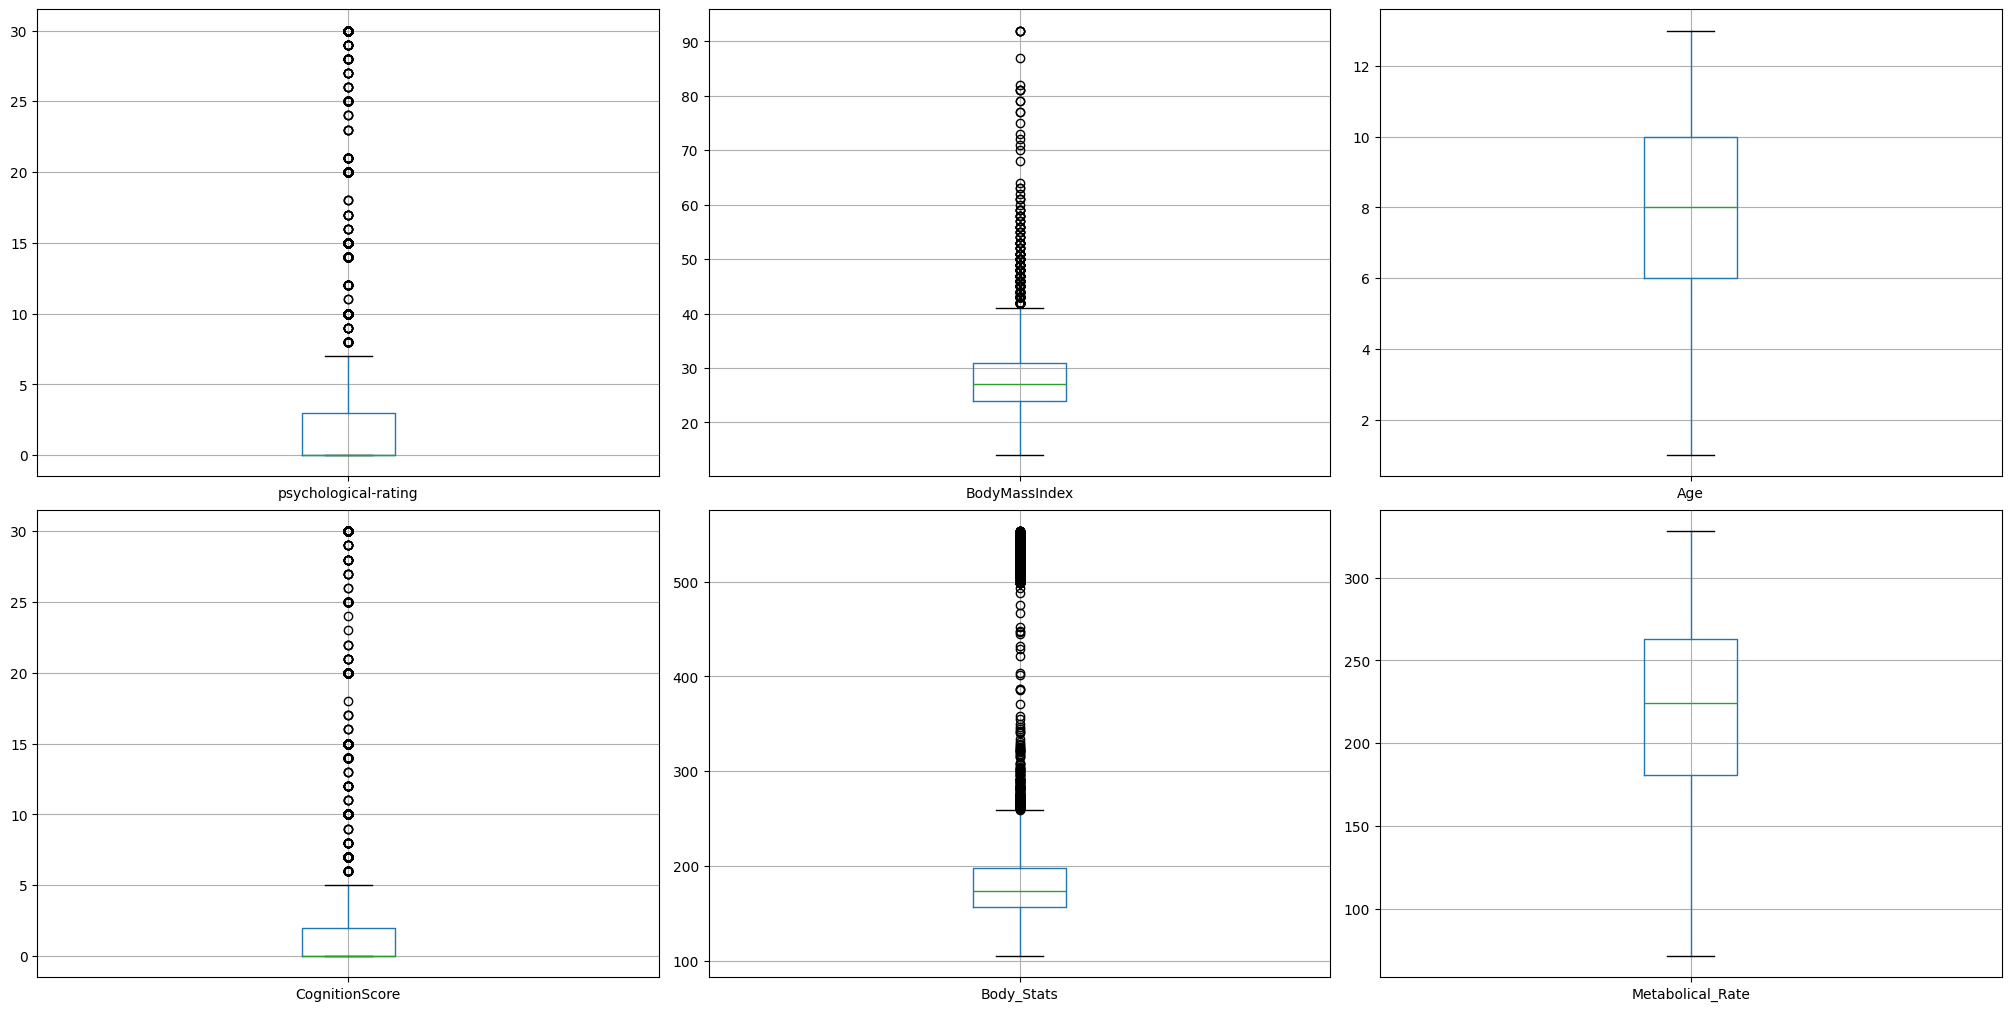

In [179]:
fig, axs = plt.subplots(nrows=2, ncols=3, constrained_layout=True, figsize=(20, 10))

for attribute, ax in zip(DIABETES_NUMERIC_COLUMNS, axs.flat):
    diabetes_full.boxplot(column=attribute, ax=ax)

fig

### Categorical attribute analysis

In [180]:
# table of count and unique values for the categorical columns
diabetes_full[DIABETES_CATEGORICAL_COLUMNS].describe()

,HealthcareInterest,PreCVA,RoutineChecks,CompletedEduLvl,alcoholAbuse,cholesterol_ver,vegetables,HighBP,Unprocessed_fructose,Jogging,IncreasedChol,gender,HealthScore,myocardial_infarction,SalaryBraket,Cardio,ImprovedAveragePulmonaryCapacity,Smoker
count,10000,10000,10000,9000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,2,6,2,2,2,2,2,2,2,2,5,2,8,2,2,2
top,Pos,0,0,PhD,0,1,1,0,1,Rarely,No,Male,2,0,8,1,1,non-smoker
freq,9534,9580,9158,3778,9442,9635,8143,5755,6368,8308,5696,5598,3587,9006,3616,7560,6368,5612


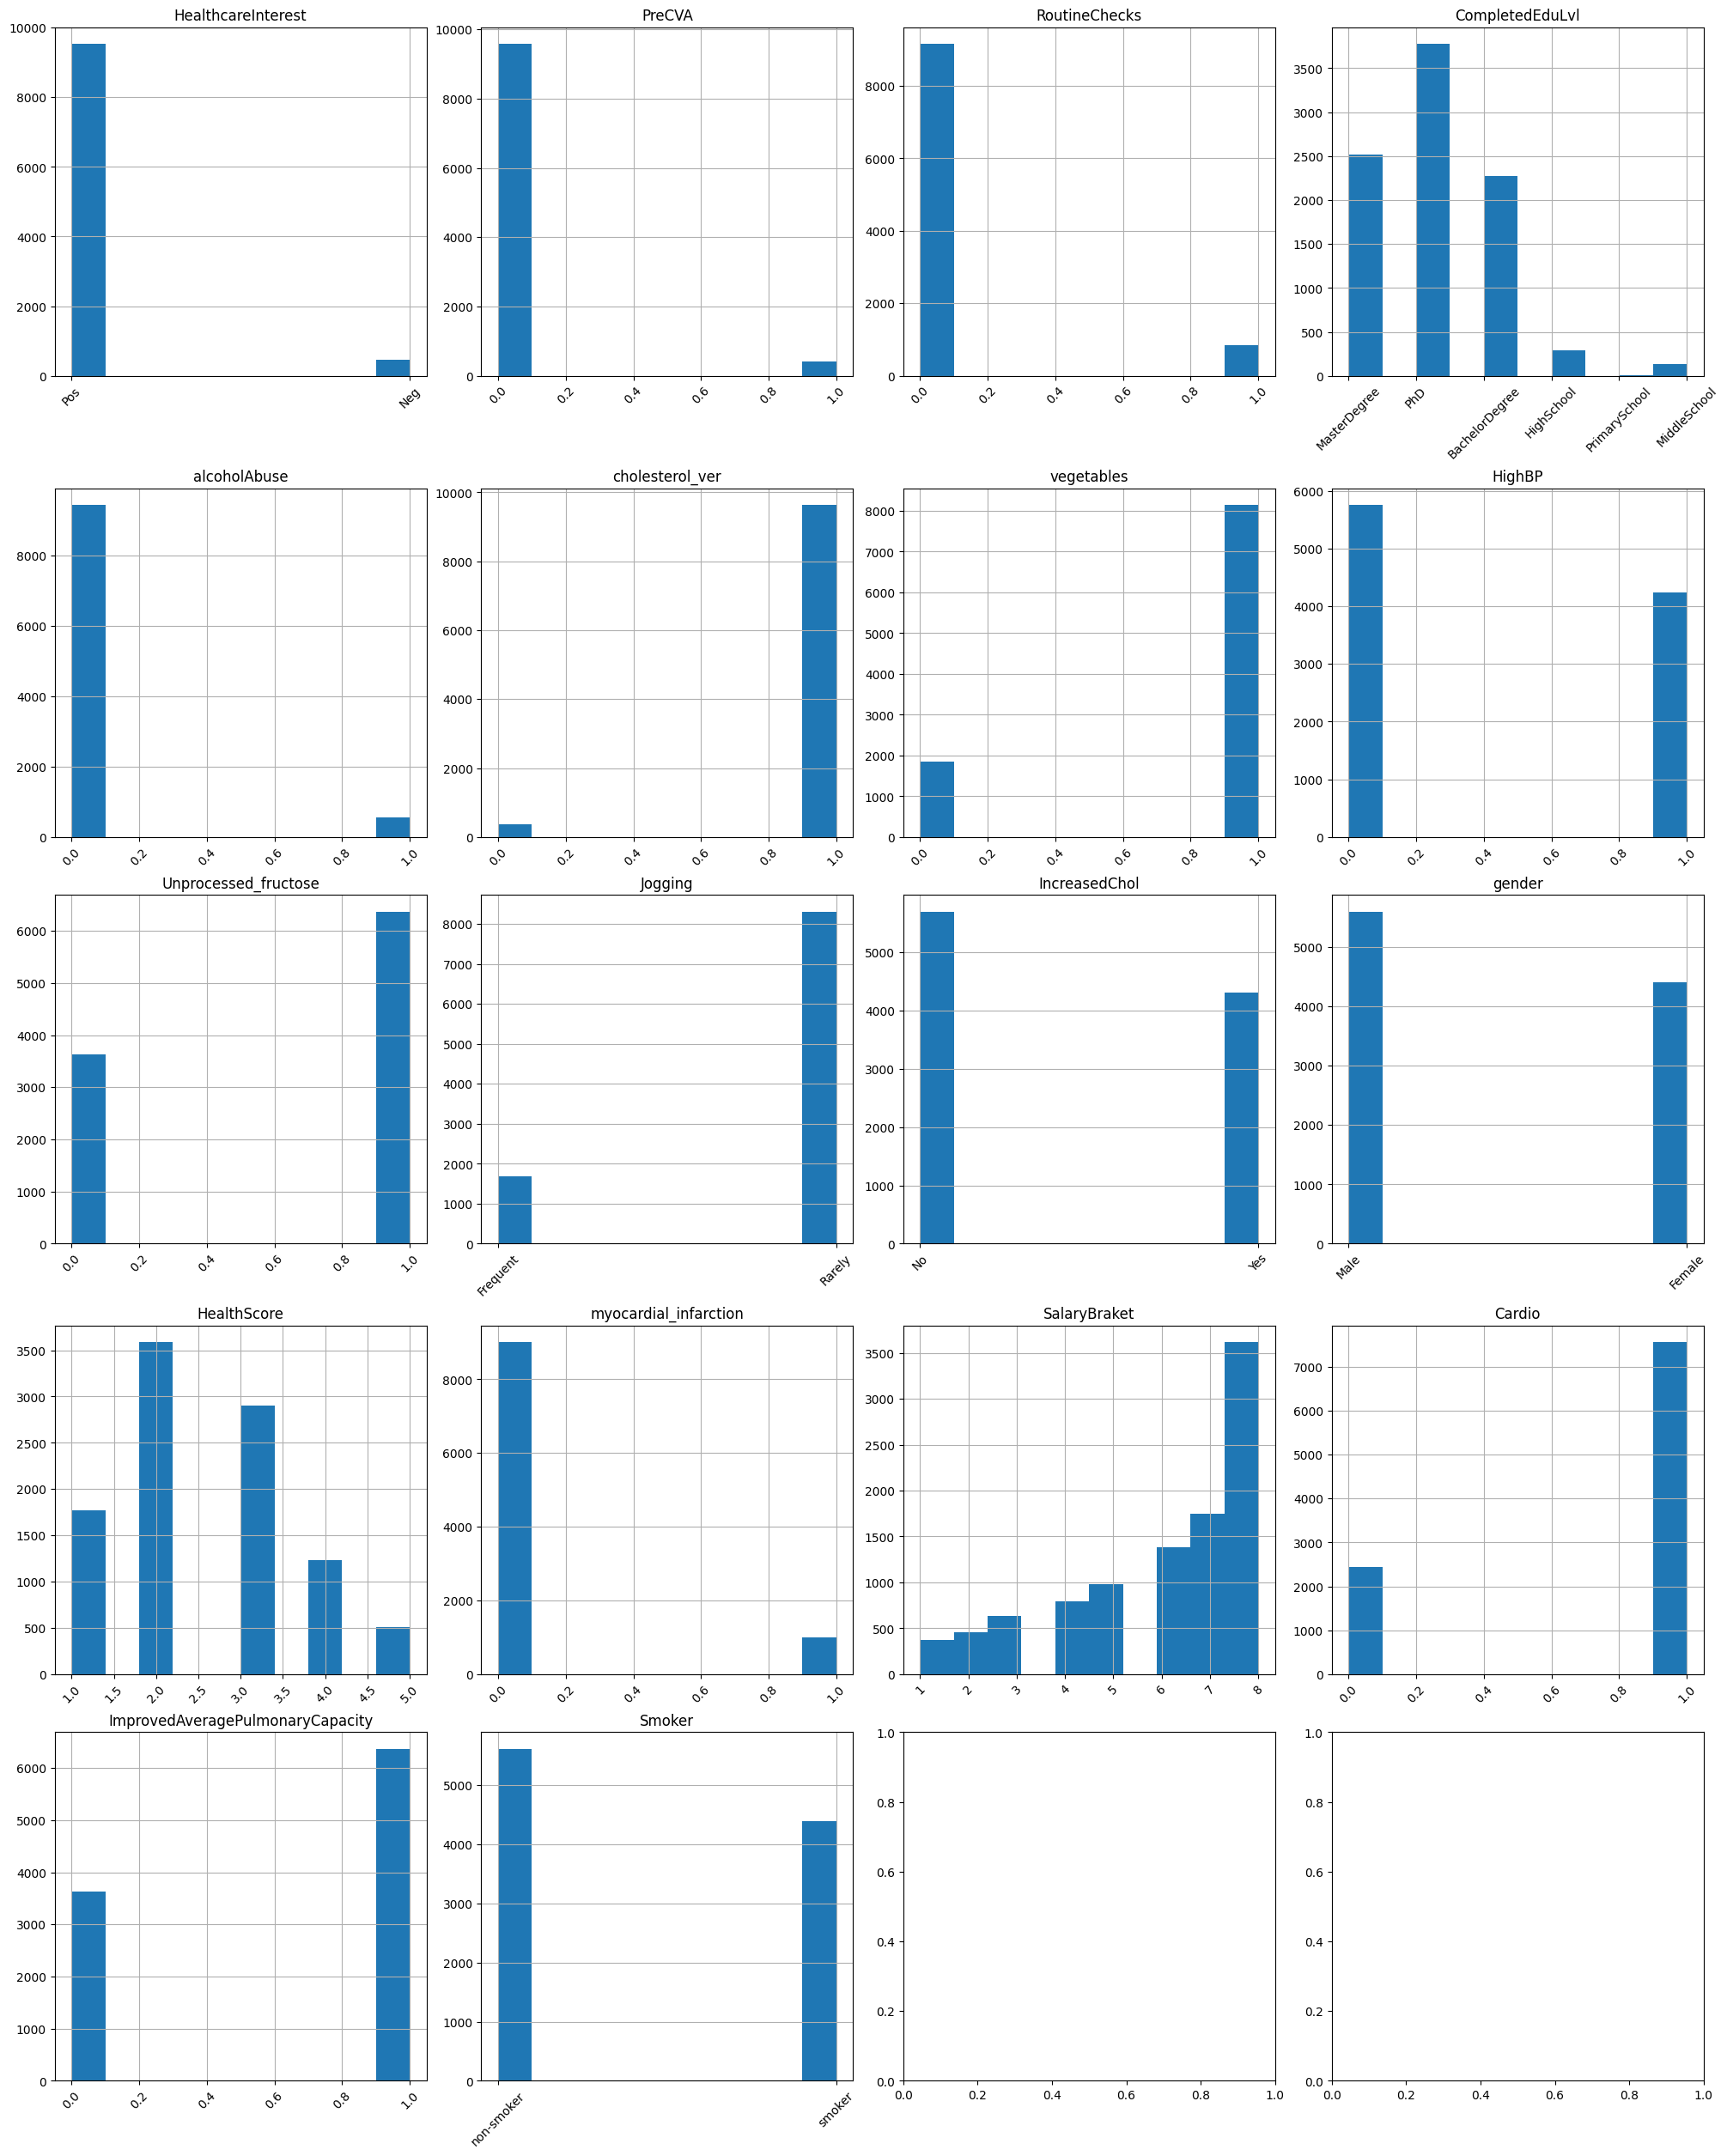

In [181]:
# graph of distribution of each categorical column
fig, axs = plt.subplots(nrows=5, ncols=4, constrained_layout=True, figsize=(20, 25))

for attribute, ax in zip(DIABETES_CATEGORICAL_COLUMNS, axs.flat):
    ax.set_title(attribute)
    ax.xaxis.set_tick_params(rotation=45)
    diabetes_full[attribute].hist(ax=ax)

fig

### Class balance

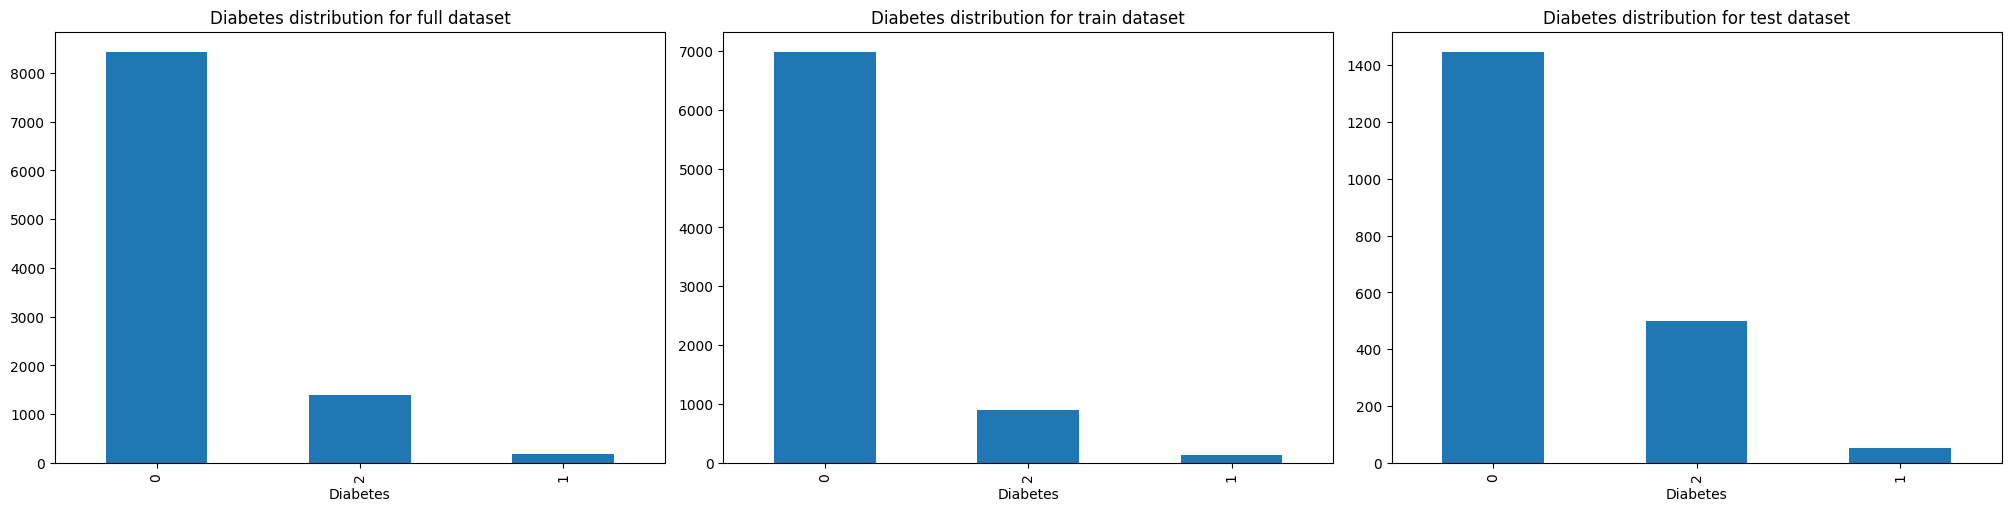

In [194]:
# reset plotter
fig, axs = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(20, 5))

for dataset, name, ax in zip([diabetes_full, diabetes_train, diabetes_test], ['full', 'train', 'test'], axs.flat):
    ax.set_title(f"Diabetes distribution for {name} dataset")
    dataset[DIABETES_TARGET_ATTRIBUTE].value_counts().plot(kind='bar', ax=ax)

fig
